In [1]:
from autogluon.multimodal import MultiModalPredictor
import pandas as pd
import uuid

2024-12-23 00:55:55.817713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import autogluon.multimodal
print(autogluon.multimodal.__version__)



1.2


In [3]:
import autogluon.core
print(autogluon.core.__version__)


1.2


In [4]:
# Load the dataset
data = pd.read_csv('AMAZON-REVIEW-DATA-CLASSIFICATION.csv').sample(n=5000, random_state=42)
data.head()

,reviewText,summary,verified,time,log_votes,isPositive
46730,"Well I mean, you have to purchase some copy of...",Three Stars,True,1445472000,0.000000,0.0
48393,"I am still getting to know this software, had ...",Quicken 2015 Mac Much Improved over Quicken 20...,False,1424995200,0.000000,1.0
41416,Has good features not available in other versi...,"Good package, but I personally could have done...",True,1385337600,0.000000,0.0
34506,Do not download if you are purchasing for an i...,I just wasted my money,True,1522540800,0.000000,0.0
43725,"I have tried similar products, but this one ca...",This is great!,False,1057708800,1.098612,1.0


In [5]:
data.shape

(5000, 6)

In [6]:
# Ensure no missing values in the target column
data['isPositive'] = data['isPositive'].fillna(0).astype(int)
data['reviewText'] = data['reviewText'].fillna("")  # Ensure no missing values in the text column

In [7]:
# Split the data
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

In [8]:
# Set up model path
model_path = "./models/automm_sentiment"

In [9]:
# Initialize and train the MultiModalPredictor
predictor = MultiModalPredictor(label='isPositive', eval_metric='accuracy', path=model_path, presets='best_quality')
predictor.fit(train_data)

=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 23 17:17:00 UTC 2024
CPU Count:          8
Pytorch Version:    2.4.1+cu121
CUDA Version:       CUDA is not available
Memory Avail:       27.44 GB / 30.89 GB (88.8%)
Disk Space Avail:   31.05 GB / 49.99 GB (62.1%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have installed tensorboard
    tensorboard --logdir /home/sagemaker-user/SENTIMENT ANALYSIS/mode

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 13: 'val_accuracy' reached 0.64000 (best 0.64000), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=0-step=13.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 28: 'val_accuracy' reached 0.90800 (best 0.90800), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=0-step=28.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 41: 'val_accuracy' reached 0.90600 (best 0.90800), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=1-step=41.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 56: 'val_accuracy' reached 0.91200 (best 0.91200), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=1-step=56.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 69: 'val_accuracy' reached 0.93400 (best 0.93400), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=2-step=69.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 84: 'val_accuracy' reached 0.93400 (best 0.93400), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=2-step=84.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 97: 'val_accuracy' reached 0.92800 (best 0.93400), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=3-step=97.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 112: 'val_accuracy' reached 0.94000 (best 0.94000), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=3-step=112.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 125: 'val_accuracy' reached 0.94200 (best 0.94200), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=4-step=125.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 140: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 153: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 168: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 181: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 196: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 209: 'val_accuracy' reached 0.93600 (best 0.94200), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=7-step=209.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 224: 'val_accuracy' reached 0.93800 (best 0.94200), saving model to '/home/sagemaker-user/SENTIMENT ANALYSIS/models/automm_sentiment/epoch=7-step=224.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 237: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 252: 'val_accuracy' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 265: 'val_accuracy' was not in top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.
/opt/conda/lib/python3.10/site-packages/autogluon/multimodal/learners/base.py:2117: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open 

Predicting: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/autogluon/multimodal/utils/checkpoint.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(per_path, map_loca

Predicting: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/autogluon/multimodal/utils/checkpoint.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(per_path, map_loca

Predicting: |          | 0/? [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/autogluon/multimodal/utils/checkpoint.py:45: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(per_path, map_loca

In [10]:
# Evaluate on test data
test_score = predictor.evaluate(test_data)
print("Test Score:", test_score)

Predicting: |          | 0/? [00:00<?, ?it/s]

Test Score: {'accuracy': 0.948}


In [11]:
# Save the model
predictor.save(model_path)

In [12]:
# Make predictions
predictions = predictor.predict(test_data[['reviewText', 'summary', 'verified', 'log_votes', 'time']])
print(predictions)

Predicting: |          | 0/? [00:00<?, ?it/s]

34506    0
43725    1
11615    0
56364    1
3787     0
        ..
28374    1
34036    0
17240    1
38007    1
11665    1
Name: isPositive, Length: 1000, dtype: int64


In [13]:
test_data['predictions'] = predictions
test_data.head(20)

,reviewText,summary,verified,time,log_votes,isPositive,predictions
34506,Do not download if you are purchasing for an i...,I just wasted my money,True,1522540800,0.000000,0,0
43725,"I have tried similar products, but this one ca...",This is great!,False,1057708800,1.098612,1,1
11615,This product says it is compatible with macs b...,Not compatible with mac osx,False,1295568000,2.484907,0,0
56364,"Easy to use, no issue with downloading, and he...","Taxes, done.",True,1393977600,0.000000,1,1
3787,This program worked fine for several dozen meg...,Bugs and blind side streets galore...,False,1102118400,2.639057,0,0
27905,The software would not download onto my PC.,One Star,True,1501372800,0.000000,0,0
3635,Very annoying,One Star,True,1434240000,0.000000,0,0
66299,I was so worried to buy this product when I ch...,"Works well, not as well as the PC version",True,1346630400,0.000000,0,1
23191,I don't know if the keys Amazon is getting are...,"Good, but constant installation problems.",True,1404172800,0.000000,0,0
41306,Did not run properly on my system graffics wa...,Did not like.,True,1376697600,0.000000,0,0


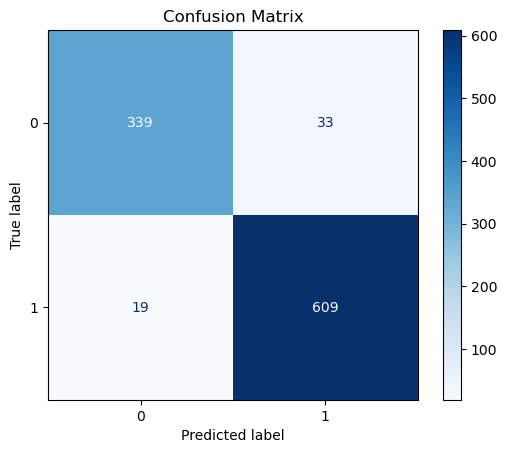

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(test_data['isPositive'], test_data['predictions'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [15]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(test_data['isPositive'], test_data['predictions'], target_names=['Negative', 'Positive'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.95      0.91      0.93       372
    Positive       0.95      0.97      0.96       628

    accuracy                           0.95      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.95      0.95      0.95      1000



In [16]:
# Save the table to a CSV file if needed
test_data.to_csv("val_predictions_table_autogluon.csv", index=False)